In [25]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('svd.csv')

In [94]:
def plot_measure(df, corpus, reduce_dim_algo, measure, measure_label=None):

    df = df[df.corpus == corpus]
    n_comp = df.param_reduce_dim__n_components.unique()
    n_knn_n = df.param_classify__n_neighbors.unique()
    n_groups = len(n_comp)

    mean_f1 = df.groupby(['param_reduce_dim__n_components', 'param_classify__n_neighbors']).mean()
    mean_f1 = mean_f1[measure]
    knn_f1 = {k : mean_f1.xs(k, level=1) for k in n_knn_n}

    fig, ax = plt.subplots()

    index = np.arange(n_groups)
    bar_width = 0.2

    opacity = 0.4

    knn_3_bar = ax.bar(index, knn_f1[3], bar_width, alpha=opacity, color='b', label='k = 3')
    knn_5_bar = ax.bar(index + bar_width, knn_f1[5], bar_width, alpha=opacity, color='g', label='k = 5')
    knn_7_bar = ax.bar(index + 2*bar_width, knn_f1[7], bar_width, alpha=opacity, color='r', label='k = 7')

    ax.set_xlabel('Number of components')
    ax.set_ylabel(measure if measure_label is None else measure_label)
    ax.set_title('%s F1-Macro for %s corpus' % (reduce_dim_algo, corpus))
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(n_comp)
    ax.legend(loc='center right')

    fig.tight_layout()
    plt.show()

In [5]:
df.corpus.unique()

array(['SyskillWeber', '20NewsGroup', 'ACM', 'TREC'], dtype=object)

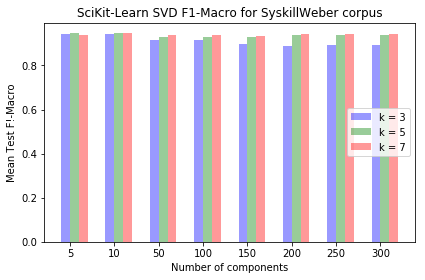

In [95]:
plot_measure(df, 'SyskillWeber', 'SciKit-Learn SVD', 'mean_test_f1_macro', 'Mean Test F1-Macro')

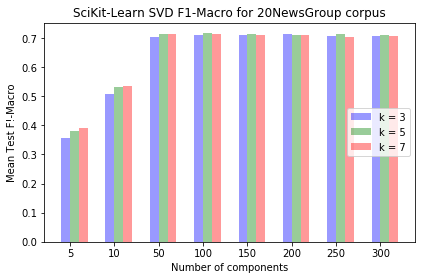

In [96]:
plot_measure(df, '20NewsGroup', 'SciKit-Learn SVD', 'mean_test_f1_macro', 'Mean Test F1-Macro')

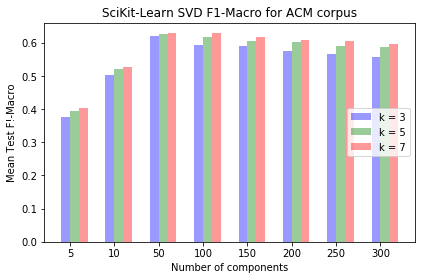

In [97]:
plot_measure(df, 'ACM', 'SciKit-Learn SVD', 'mean_test_f1_macro', 'Mean Test F1-Macro')

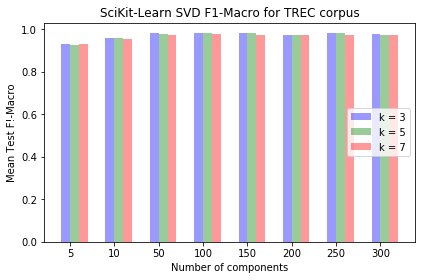

In [98]:
plot_measure(df, 'TREC', 'SciKit-Learn SVD', 'mean_test_f1_macro', 'Mean Test F1-Macro')